# EDA of Heart disease 

This week we are exploring the heart disease dataset from [here](https://archive.ics.uci.edu/ml/datasets/heart+Disease).


1. **Age**
2. **Sex**
  - 1 = male
  - 0 = female
3. **Chest pain** (CP)
  - Value 0: asymptomatic
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: typical angina
4. **trestbps** 
  - Resting blood pressure (in mm Hg on admission to the hospital)
5. **chol** 
  - Serum cholestoral in mg/dl
6. **fbs** (Fasting blood sugar)
  - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg** - Resting electrocardiographic results
8. **thalach** - Maximum heart rate achieved 
9. **exang** - Exercise induced angina (1= Yes, 0 = No)
10. **oldpeak** - ST depression induced by exercise relative to rest
11. **slope** - The slope of the peak exercise ST segment
  - 1: Upsloping
  - 2: Flat
  - 3: Downsloping
12. **ca** (coloured arteries) - Number of major vessels (0-3) colored by flourosopy
13. **thal** - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. **target** - 0 = Heart disease present, 1 = Heart disease absent 

## Objective
1. Find any correlations between attributes
2. Find correlations between each attribute and the diagnosis of heart disease


## Mounting drive and importing dataset

In [3]:
# Using google drive with Colab, run on every reconnection
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
# Importing required packages 
import numpy as np
import pandas as pd
import scipy.stats # Needed to compute statistics for categorical data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Making sns as default for plots 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Defining the data_frame as df


- Function that print the following:
  - Read a CSV file into a dataframe
  - Print 5 rows of data
  - Print number of rows and columns
  - Print datatype for each column
  - Print number of NULL/NaN values for each column
  - Print summary data using describe()
  - Assign the dataframe into a variable call df

In [5]:
def data_frame():
  """ 
  Prints necesaary details and returns the dataframe into the variable 'df'.
  1. Read the data into the variable dataframe
  2. print first 5 rows of data
  3. Print number of rows & columns
  4. print datatypes of each column
  5. print total number of NULL/NAN values
  6. print summary of all the data
  """
  data = pd.read_csv('/content/gdrive/My Drive/datasets/heart_disease/dataset/heart.csv')
  print(data.head())
  print("\n")
  print(data.shape)
  print("\n")
  print(data.dtypes)
  print("\n")
  print(data.isnull().sum())
  print("\n")
  print(data.describe())
  return data

df = data_frame()

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


(303, 14)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
t

NO NULL VALUES! 

Next, we will use the PairPlot tool from Seaborn to see the distribution and relationships among variables.


## Pairplots to see distribution and relationships

(<seaborn.axisgrid.PairGrid at 0x7f2afdea2eb8>,
 <seaborn.axisgrid.PairGrid at 0x7f2b02847828>)

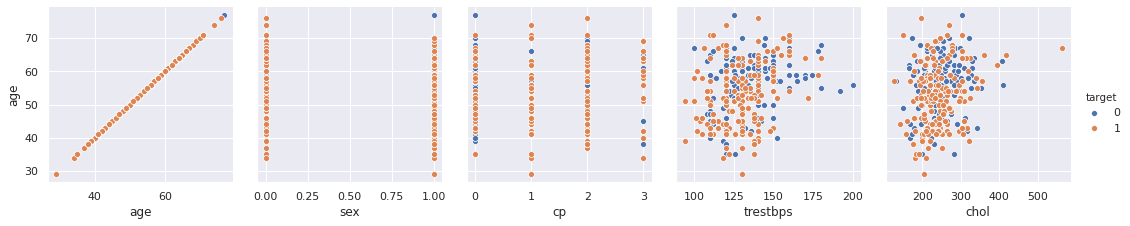

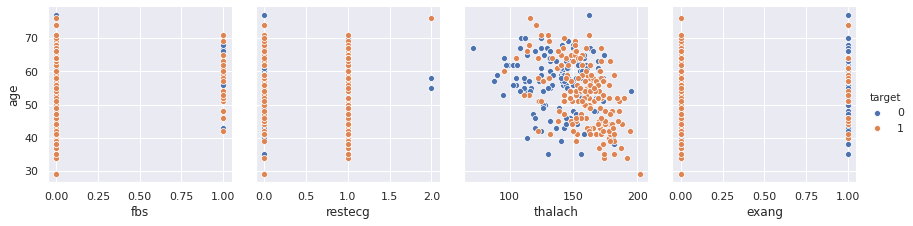

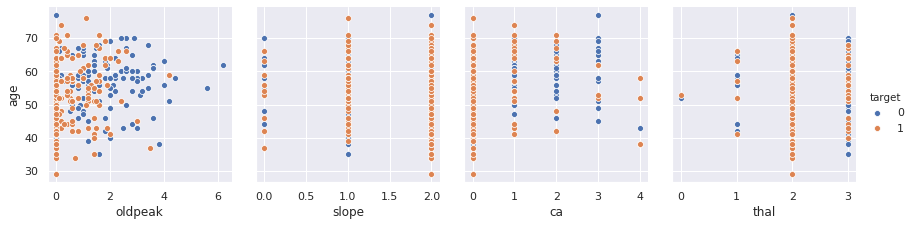

In [0]:
# breaking into different columns
df1 = ['age', 'sex','cp', 'trestbps','chol']
df2 = ['fbs', 'restecg', 'thalach', 'exang']
df3 = ['oldpeak', 'slope', 'ca' ,'thal']

def pairplot(x):
  '''
  Get the pairplots for each variable against all variables
  '''
  p = sns.pairplot(df, x_vars = df1, y_vars = x, hue= 'target', height= 3)
  q = sns.pairplot(df, x_vars = df2, y_vars = x, hue= 'target', height= 3)
  r = sns.pairplot(df, x_vars = df3, y_vars = x, hue= 'target', height= 3)

  return p, q, r

pairplot('age')

### Analysis
* Target are distributed across ages 40 to 70, but increase in age increases chance of heart disease
* Thalac (Maximum heart rate achieved) decreases with age

## Pairplots for `cp` (chest pain)


(<seaborn.axisgrid.PairGrid at 0x7f2b019cabe0>,
 <seaborn.axisgrid.PairGrid at 0x7f2b0b0a5d30>)

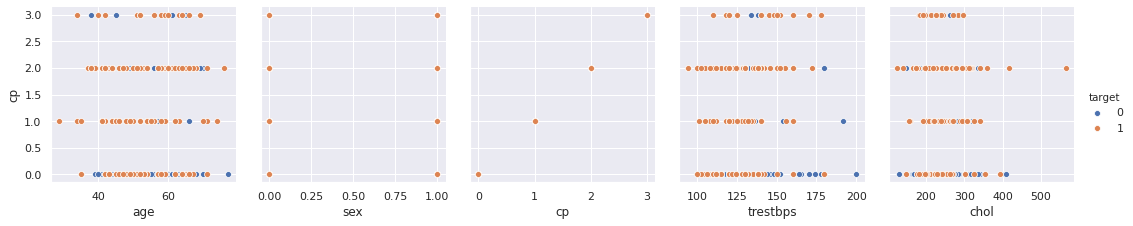

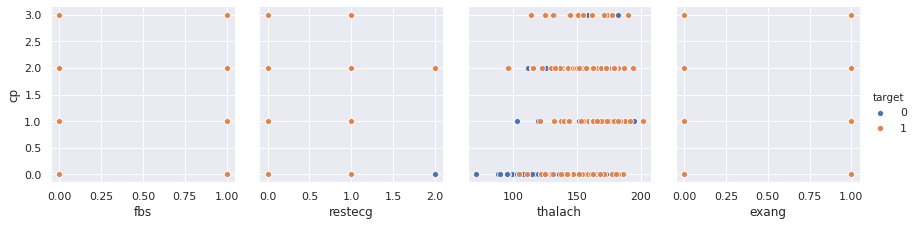

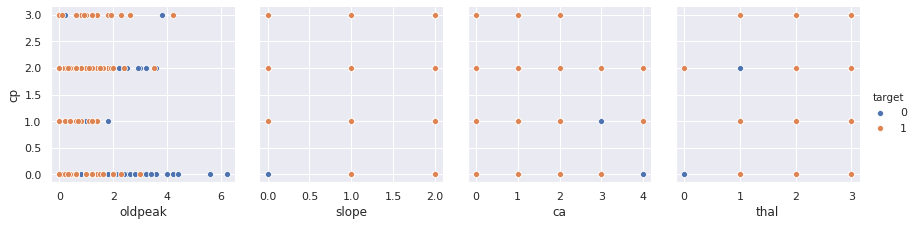

In [0]:
pairplot('cp')

### Analysis
* Even with cp level of 3, the person may not be a target. Therefore, chest pain may not be completely indicative of potential heart disease.
* People with 0 chest pain, can be a potential target for heart disease.

## Pairplot of `trestbps` (resting blood pressure)

(<seaborn.axisgrid.PairGrid at 0x7f2afdf0ba58>,
 <seaborn.axisgrid.PairGrid at 0x7f2b0b703780>)

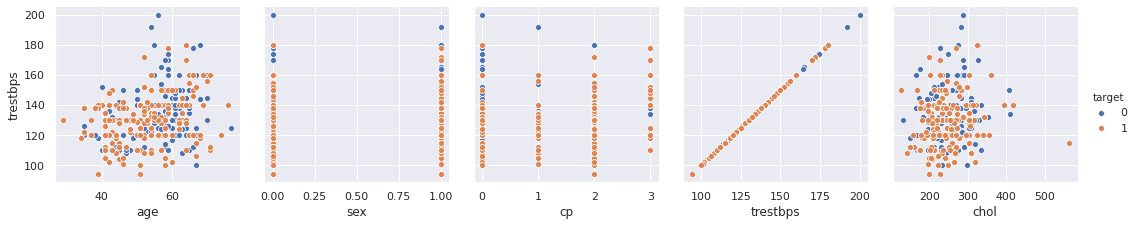

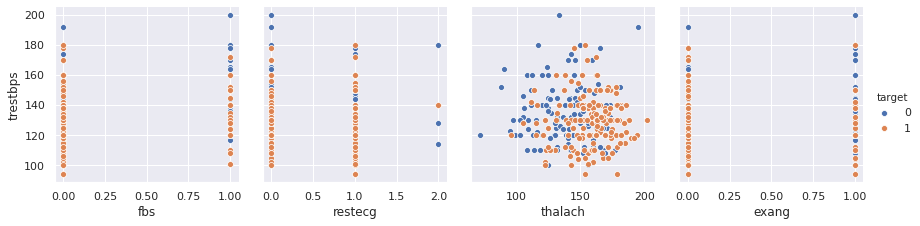

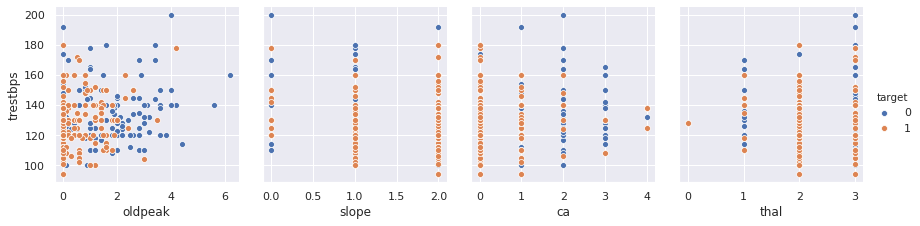

In [0]:
pairplot('trestbps')

### Analysis
* Increase in blood pressure, increases the chance of a heart disease being present.



## Pairplot for `chol` (cholesterol)


(<seaborn.axisgrid.PairGrid at 0x7f2b09003550>,
 <seaborn.axisgrid.PairGrid at 0x7f2afbe3f1d0>)

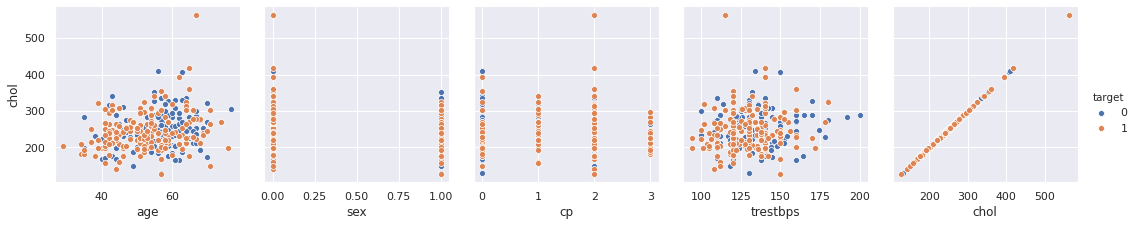

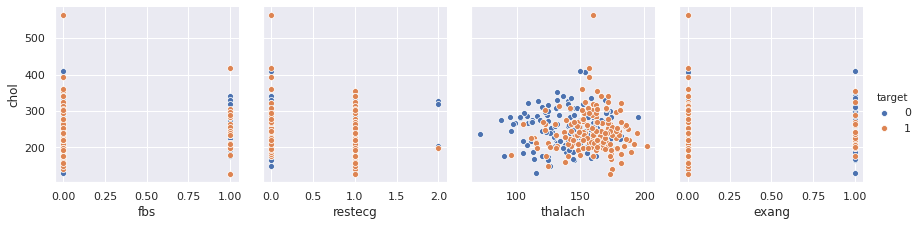

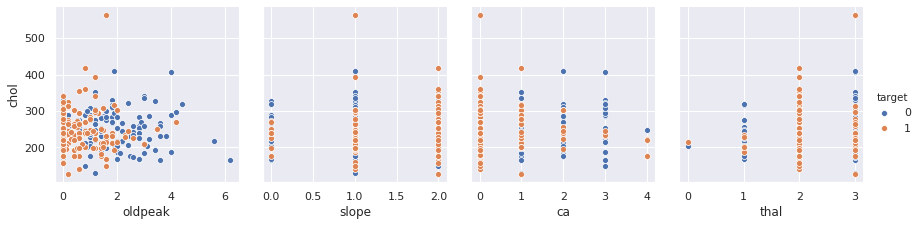

In [0]:
pairplot('chol')

### Analysis
* Higher cholesterol cannot be linked with increased chest pains or higher chances of being a target to hear disease.

## Pairplot for `fbs` (fasting body sugar)
### Analysis
* The column is just bi factor (1 & 0), which will not provide any information from the pair plots.

## Pairplot for `restecg` (resting ecg)



(<seaborn.axisgrid.PairGrid at 0x7f2b0ac49b38>,
 <seaborn.axisgrid.PairGrid at 0x7f2b064794a8>)

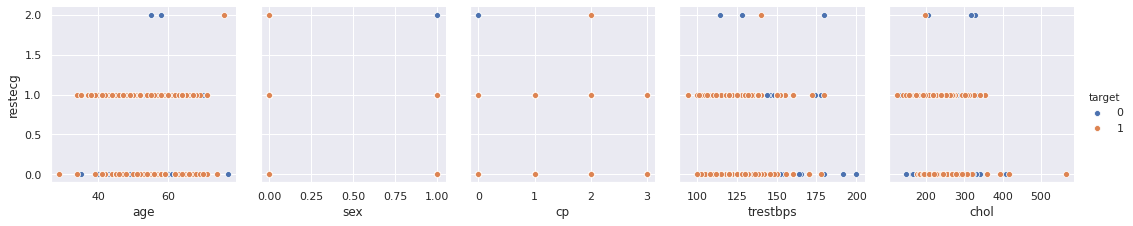

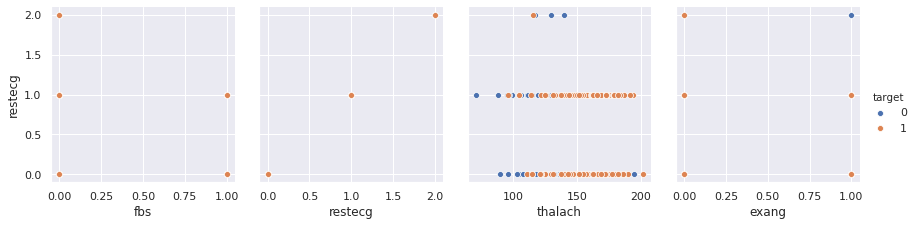

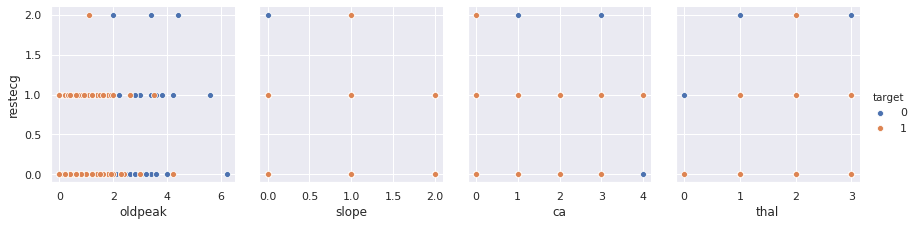

In [0]:
pairplot('restecg')

### Analysis
* Value 2 i.e. Left ventricular hyperthrophy by Estes criteria have high chance of heart disease being present.
* **This shows that restECG is useful in checking for heart diseases.**

## Pairplot for `thalach` (maximum heart rate achieved)


(<seaborn.axisgrid.PairGrid at 0x7f2b06c84fd0>,
 <seaborn.axisgrid.PairGrid at 0x7f2b0b378b00>)

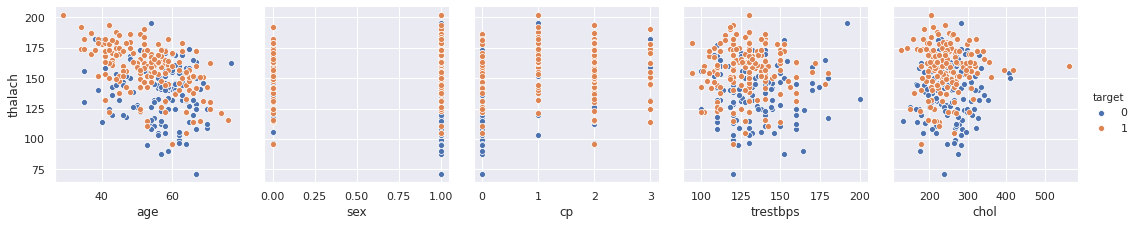

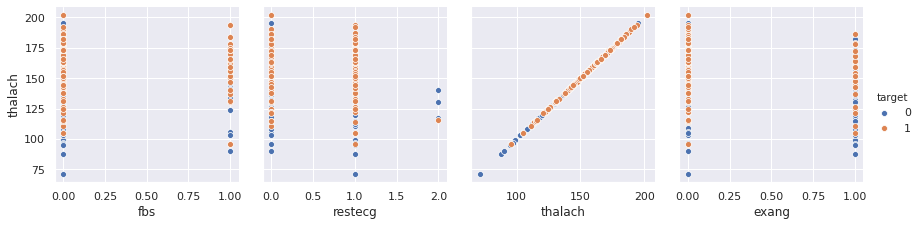

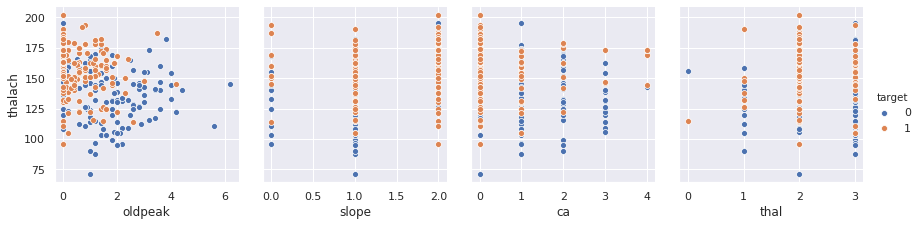

In [0]:
pairplot('thalach')

## Pairplot for `exang` (exercise induced angina)


(<seaborn.axisgrid.PairGrid at 0x7f2b075c6080>,
 <seaborn.axisgrid.PairGrid at 0x7f2afc199e80>)

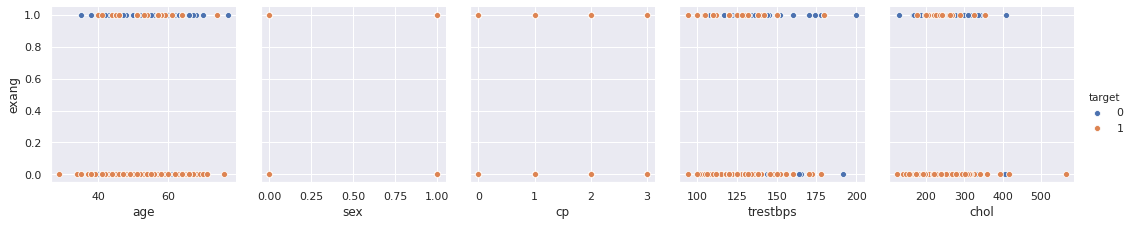

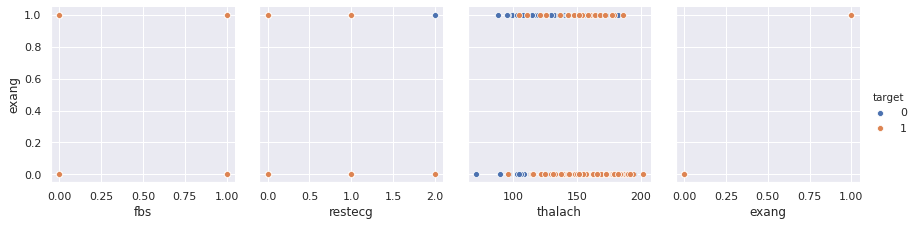

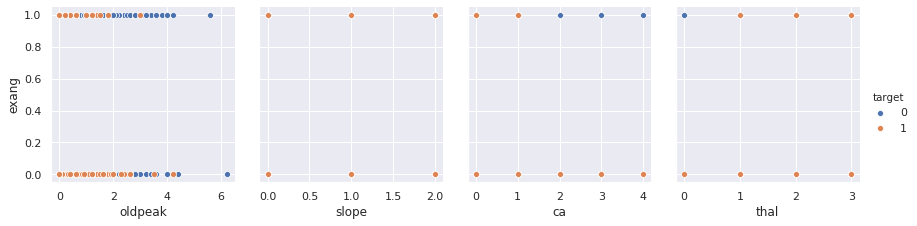

In [0]:
pairplot('exang')

### Analysis
* Exercise induced pain are more definitely indicative of heart disease being present.

## Pairplot for `oldpeak` (ST depression or pain induced by exercise)

(<seaborn.axisgrid.PairGrid at 0x7f2b08b57a20>,
 <seaborn.axisgrid.PairGrid at 0x7f2b053bad68>)

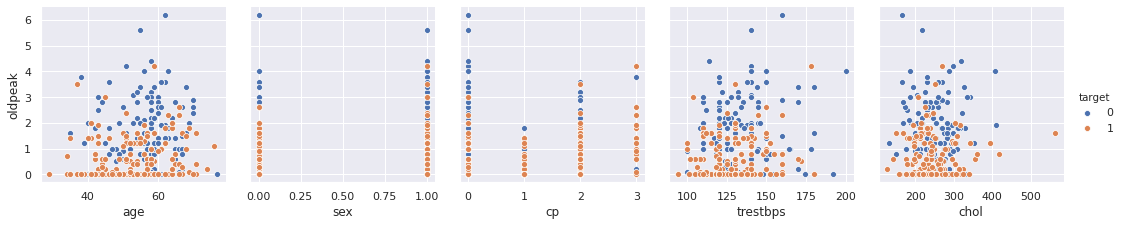

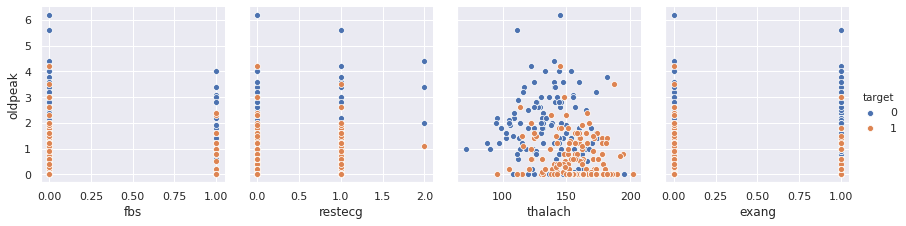

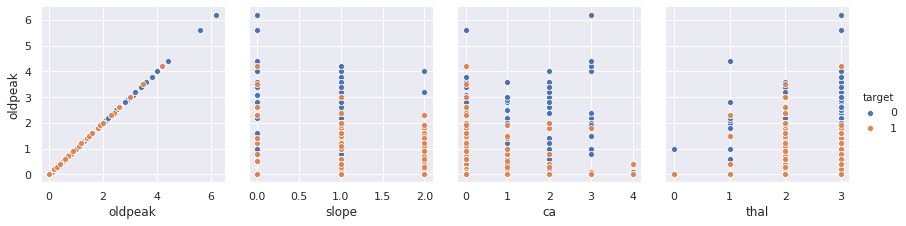

In [0]:
pairplot('oldpeak')

### Analysis
* Values in oldpeak clearly indicate the chances of having a heart disease.
* old pain points plus cholestrol level in range of ~300 clearly stats higher probability of being a heart problem target.

## Pairplot for `slope` (slope of oldpeak segment)


(<seaborn.axisgrid.PairGrid at 0x7f2b031e8828>,
 <seaborn.axisgrid.PairGrid at 0x7f2afc227278>)

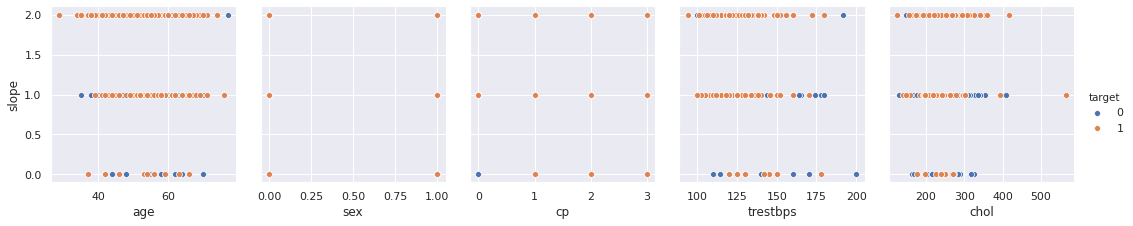

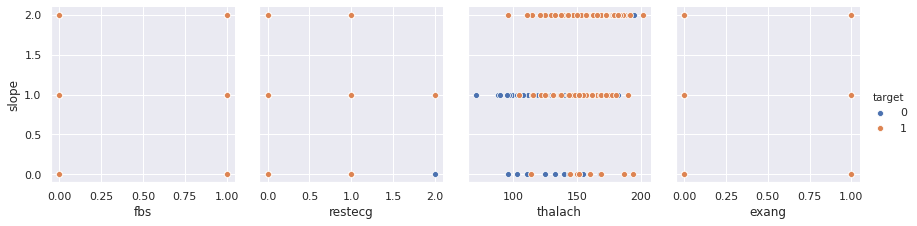

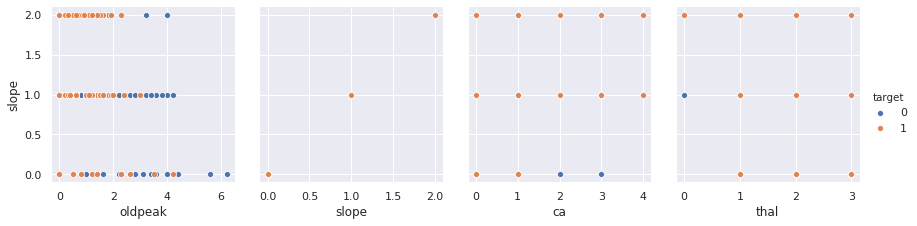

In [0]:
pairplot('slope')

### Analysis
* The following factors are indicative of being a target for heart problem.
  * Slope is 0(up-slope) or 1(constant)
  * `trestbps` (resting blood pressure) is high
  * `chol` level is > 300 mg/dl
  * `thalach` (maximum heart rate achieved) is low

## Pairplot for `ca` (number of major vessels)

(<seaborn.axisgrid.PairGrid at 0x7f2afb2cf2b0>,
 <seaborn.axisgrid.PairGrid at 0x7f2afb5b4208>)

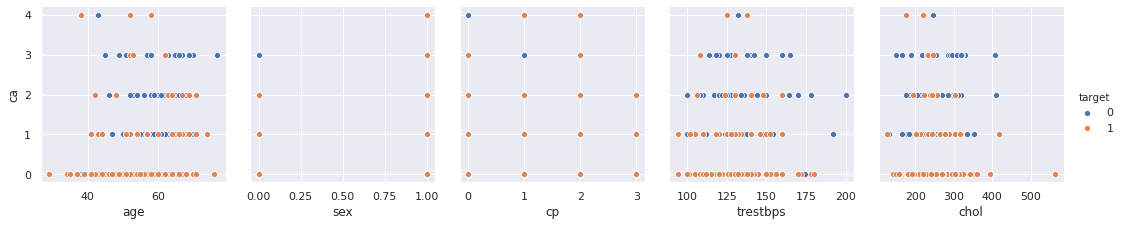

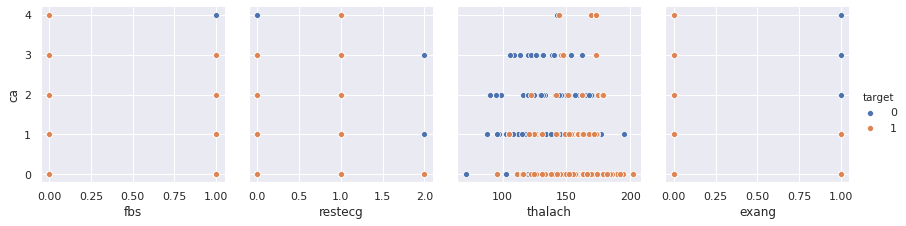

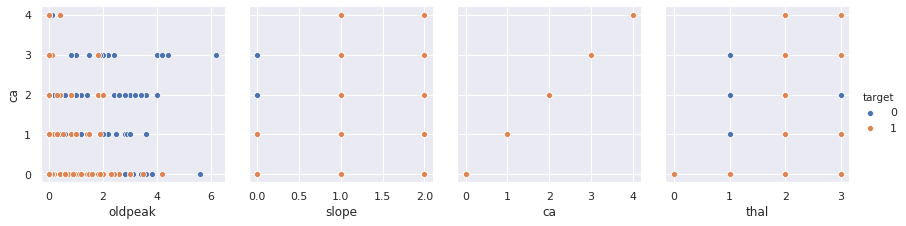

In [0]:
pairplot('ca')

### Analysis
* ca values of 2,3 indicate presence of heart problem.
* ca value of 3 and high cholesterol or low resting heart rate indicate heart problem

## Pairplot for `thal` (presence of thalassemia)

(<seaborn.axisgrid.PairGrid at 0x7f2afc52e400>,
 <seaborn.axisgrid.PairGrid at 0x7f2b0ae207f0>)

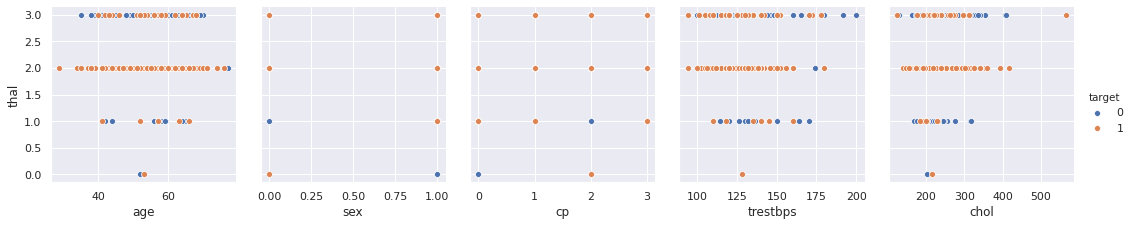

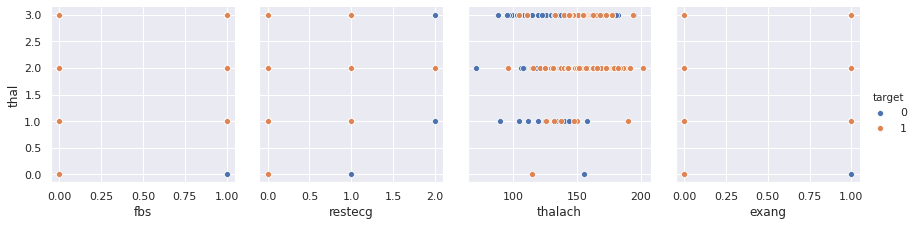

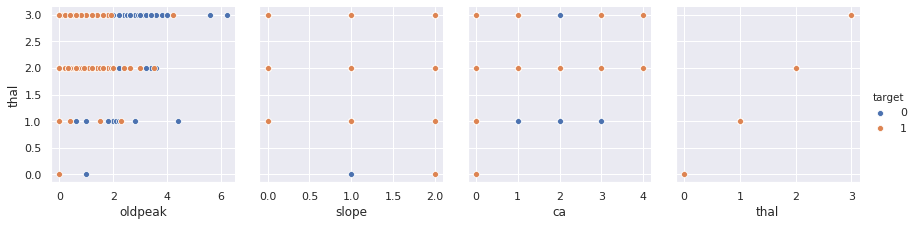

In [0]:
pairplot('thal')

### Analysis
* `thal` level of 3 along with pointers mentioned before such as high chol, low thalach, are indication of heart disease being present.

## Correlation Matrix

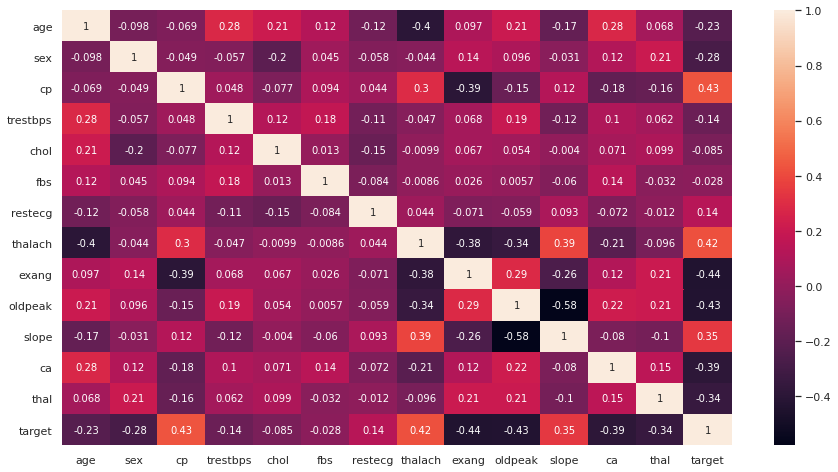

In [0]:
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

## Looking into correlation
- Using Pearson correlation for numeric-numeric data
- Using Chi-Square test for categorical-categorical data



### Correlation between age and heart disease

No handles with labels found to put in legend.


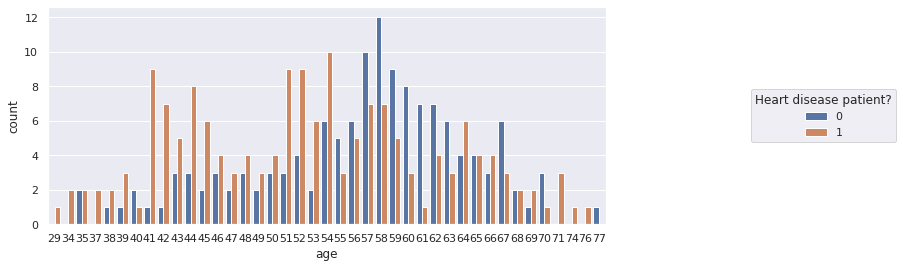

In [0]:
# Look into distribution by plotting a histogram
plt.figure(figsize=(10,4))
plt.legend(loc='upper left')

g = sns.countplot(data = df, x = 'age', hue = 'target')
g.legend(title = 'Heart disease patient?', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

We can see that patients with heart disease are clustered around the age of late 50s to late 60s. 

In [0]:
# Heart disease patients
age_corr = ['age', 'target']
age_corr1 = df[age_corr]
age_corr_y = df[age_corr1['target'] == 0].groupby(['age']).size().reset_index(name = 'count')
age_corr_y.corr()

,age,count
age,1.000000,0.337858
count,0.337858,1.000000


In [0]:
# Healthy patients
age_corr_n = age_corr1[age_corr1['target'] == 1].groupby(['age']).size().reset_index(name = 'count')
age_corr_n.corr()

,age,count
age,1.000000,-0.129151
count,-0.129151,1.000000


- We observed high correlation between heart disease patients and age. It seems like age is the precursor of heart disease. 

### Correlation between sex and heart disease

No handles with labels found to put in legend.


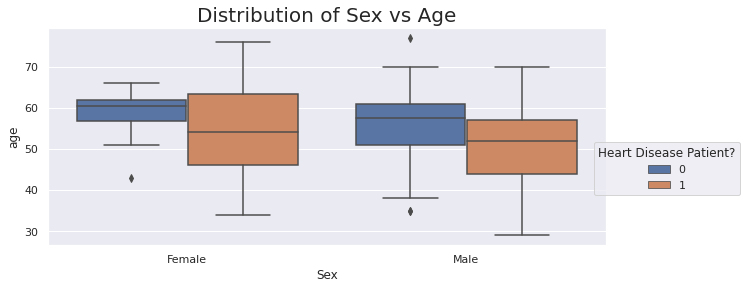

In [0]:
# Plot a boxplot

fig, ax = plt.subplots(figsize= (10,4))
plt.legend(loc='upper left')
sns.boxplot(data=df, x='sex', y='age', hue='target', ax=ax)
plt.xlabel("Sex")
plt.xticks([0, 1], ["Female", "Male"])
plt.title("Distribution of Sex vs Age", fontsize=20)
plt.legend(title="Heart Disease Patient?", bbox_to_anchor=(1.25, 0.5))



### *Analysis*
* Males are more likely to be a heart disease patient. The boxplot clearly indicates that males across the age of early 40s to late 60s are susceptible to heart problems.

#### Chi-sq
As we know, sex is a categorical variable. Target, which tells us whether the patient has heart disease or not is also a categorical variable. To compute the correlation between two categorical data, we will need to use Chi-Square test. We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).

- The null hypothesis is that they are independent.
- The alternative hypothesis is that they are correlated in some way.

In [0]:
# Use chi-square to measure correlation
cont = pd.crosstab(df["sex"],df["target"]) # crosstab creates a cross relation matrix based on the input variables.
# IN this case, for sex 0 & 1, how many are target 0 & target 1
print(cont)
g, p, dof, expctd = scipy.stats.chi2_contingency(cont)
g, p

target    0   1
sex            
0        24  72
1       114  93


(22.717227046576355, 1.8767776216941503e-06)

#### Analysis
* though the number of observations is low, if we consider the p-value & alpha
  * p value(1.8 x 10^-6) is lower than alpha of 0.05). Therefore the null hypothesis is invalid

* Target for heart disease is dependent upon the Sex.

### Correlation between chest pain and heart disease 

In [7]:
# Chi-square test
crosstab1 = pd.crosstab(df.cp, df.target)
print(crosstab1)
g, p, dof, expctd = scipy.stats.chi2_contingency(crosstab1)
g, p

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


(81.68642755194445, 1.3343043373050064e-17)

#### Analysis
* Seems like chest pain is correlated to heart disease. 

### Correlation between resting blood pressure and heart disease

In [9]:
# Showing correlation between heart disease patients and trestbps
crosstab2 = pd.crosstab(df.trestbps, df.target)
g, p, dof, expctd = scipy.stats.chi2_contingency(crosstab2)
g, p


(47.70581770079516, 0.4848213101540371)

#### Analysis
* p-value is significantly higher than 0.05, that means our null hypothesis is correct.
there is no clear correlation between resting blood pressure and heart disease.

### Correlation between serum cholesterol and heart disease
- Here, we are rounding the cholesterol value to the tenth place. If we dont do that we will be getting tons of count = 1. This will affect the correlation test.

In [13]:
# Showing number of heart disease patients based on serum cholesterol
chol_corr = ['chol', 'target']
chol_corr1 = df[chol_corr]
chol_corr2 = chol_corr1.copy() 
chol_corr2.chol = chol_corr2.chol.round(decimals=-1)
chol_corr_y = chol_corr2[chol_corr2['target'] == 0].groupby(['chol']).size().reset_index(name = 'count')
chol_corr_y.corr()

,chol,count
chol,1.000000,-0.014997
count,-0.014997,1.000000


In [18]:
# Showing number of healthy patients based on serum cholesterol
chol_corr_n = chol_corr1[chol_corr1['target'] == 1].groupby(['chol']).size().reset_index(name = 'count')
chol_corr_n.corr()

,chol,count
chol,1.000000,-0.178612
count,-0.178612,1.000000


In [20]:
g, p, dof, expctd = scipy.stats.chi2_contingency(chol_corr1)
g, p

(155.92294291639743, 0.9999999999998455)

#### Analysis
* There doesnt seem to be strong correlation between serum cholesterol and heart disease

### Correlation between ECG results and heart disease 
 - Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
 - Value 1: normal
 - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

In [12]:
# Showing number of heart disease patients based on resting ECG results
crosstab3 = pd.crosstab(df.restecg, df.target)
print(crosstab3)

target    0   1
restecg        
0        79  68
1        56  96
2         3   1


In [14]:
# Chi-square test
g, p, dof, expctd = scipy.stats.chi2_contingency(crosstab3)
g, p

(10.023091785081, 0.006660598773498031)

#### Analysis
* p-value is < 0.05 which invalidates the null hypothesis. Therefore, heart disease has a relation with resting ECG

### Correlation between maximum heart rate and heart disease

In [8]:
# Showing number of healthy patients based on maximum heart rate
thalach_corr_list = ['thalach', 'target']
thalach_corr = df[thalach_corr_list]
thalach_corr_y = thalach_corr[thalach_corr.target == 0].groupby(['thalach']).size().reset_index(name='count')
thalach_corr_y.corr()

,thalach,count
thalach,1.000000,0.133651
count,0.133651,1.000000


In [10]:
thalach_corr_n = thalach_corr[thalach_corr.target == 1].groupby(['thalach']).size().reset_index(name='count')
thalach_corr_n.corr()

,thalach,count
thalach,1.000000,0.239275
count,0.239275,1.000000


In [11]:
# Showing p-value of heart disease patients based on maximum heart rate
crosstab4 = pd.crosstab(df.thalach, df.target)
g, p, dof, expctd = scipy.stats.chi2_contingency(crosstab4)
g, p

(110.13495283153387, 0.07347837419093241)

#### Analysis

* p-value is > 0.05 therefore the null hypothesis stands, which means the columns 'thalach' and 'target' are independent of each other.

## Summary

### About the dataset
* The number of observations (303) are small, therefore any EDA based on this should be taken with a grain of salt.

### EDA
* The parameters that are a strong measurement of heart problems are:
  1. Age - older people are more likely to have heart problem.
  1. Sex - Males are more susceptible to being a patient
  1. Chest pain - chest pains are a good indication of heart problem
  1. Exlang - exercise induced pain 